In [ ]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**jawaban 1A.**
tipe data pada setiap kolom sudah sesuai,
nama kolom dengan isi datanya sudah sesuai.

In [ ]:
 #cek missing value
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**jawaban 1B.** tidak ada kolom yang memiliki nilai kosong 

In [ ]:
for column in df.columns:
    print(f"{column} :")
    print(df[column].unique())
    print("")   

id :
[     1      2      3 ... 381107 381108 381109]

Gender :
['Male' 'Female']

Age :
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License :
[1 0]

Region_Code :
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured :
[0 1]

Vehicle_Age :
['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage :
['Yes' 'No']

Annual_Premium :
[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel :
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.

In [ ]:
#membagi tipe data numerik dan categorical

numbs=['Age', 'Region_Code','Annual_Premium','Vintage','Policy_Sales_Channel']
cats=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [ ]:
df[numbs].describe()

,Age,Region_Code,Annual_Premium,Vintage,Policy_Sales_Channel
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397,112.034295
std,15.511611,13.229888,17213.155057,83.671304,54.203995
min,20.000000,0.000000,2630.000000,10.000000,1.000000
25%,25.000000,15.000000,24405.000000,82.000000,29.000000
50%,36.000000,28.000000,31669.000000,154.000000,133.000000
75%,49.000000,35.000000,39400.000000,227.000000,152.000000
max,85.000000,52.000000,540165.000000,299.000000,163.000000


In [ ]:
df[cats].describe()

,Driving_License,Previously_Insured,Response
count,381109.000000,381109.000000,381109.000000
mean,0.997869,0.458210,0.122563
std,0.046110,0.498251,0.327936
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
df[cats].describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


**jawaban 1C.** tidak ada kolom yang memiliki nilai summary aneh 

In [ ]:
# df.columns = df.columns.str.lower()
# df.head()

# **Univariate Analysis**

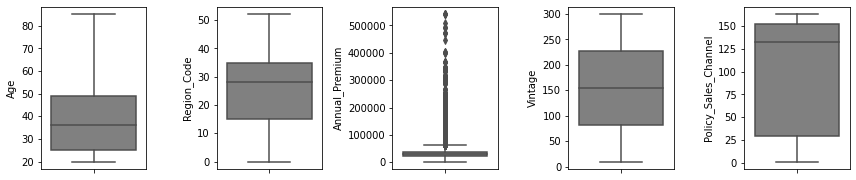

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(numbs)):
    plt.subplot(2, len(numbs), i+1)
    sns.boxplot(y=df[numbs[i]], color='gray')
    plt.tight_layout()



1.   Dalam data annual premium banyak outliers
2.   Mungkin **annual premium bisa dibuat kategori2 dalam tahap data pre-processing**





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

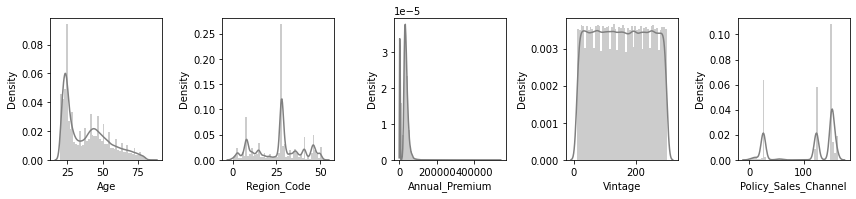

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(numbs)):
    plt.subplot(2, len(numbs), i+1)
    sns.distplot(df[numbs[i]], color='gray')
    plt.tight_layout()

data pada kolom age dan annual premium berbentuk right skewed sehingga dianalisis lebih lanjut pada tahap data pre-processing<br>
data pada kolom region code, policy sales channel ada berbentuk multi-modal <br>
sementara data pada kolom vintage berdistribusi normal


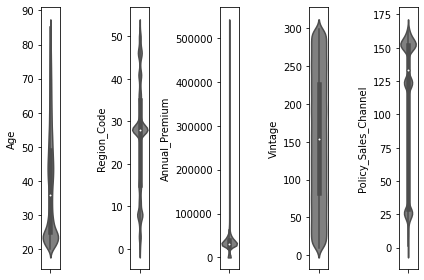

In [ ]:
for i in range(0, len(numbs)):
    plt.subplot(1, len(numbs), i+1)
    sns.violinplot(y=df[numbs[i]], color='gray', orient='v')
    plt.tight_layout()



-pada kolom age data customer terbanyak ada pada umur 24 <br>
-pada kolom region data customer terbanyak ada pada region 28 <br>
-pada kolom annual premium customer terbanyak ada pada nilai 2630, dan membunyai banyak outliers <br>
-pada kolom vintage memiliki data jumlah customer yang sama setiap nilainya <br>
-pada kolom policy channel data customer terbanyak ada pada 152

In [ ]:
plt.figure(figsize=(20,5))
for i in range(0, len(cats),i+1):
  plt.subplot(2, len(cats), i+1)
  sns.countplot(df[cats[i]], color='gray', orient='h')
  plt.tight_layout()

In [ ]:
df.stb.freq(['Gender'], cum_cols = False)

,Gender,count,percent
0,Male,206089,54.07613
1,Female,175020,45.92387


54% customer health insurance adalah laki-laki

In [ ]:
df.stb.freq(['Driving_License'], cum_cols=False)

,Driving_License,count,percent
0,1,380297,99.786938
1,0,812,0.213062


99.7% customer health insurance mempunyai driving license/ hampir seluruh dataset

In [ ]:
df.stb.freq(['Previously_Insured'], cum_cols=False).head()

,Previously_Insured,count,percent
0,0,206481,54.178988
1,1,174628,45.821012


54% customer health insurance sudah mempunyai asuransi kendaraan/ lebih dari setengah dataset

In [ ]:
df.stb.freq(['Vehicle_Age'], cum_cols=False)

,Vehicle_Age,count,percent
0,1-2 Year,200316,52.561341
1,< 1 Year,164786,43.238549
2,> 2 Years,16007,4.200111


52% customer health insurance mempunya umur kendaraan 1-2 tahun/ lebih dari setengah dataset

In [ ]:
df.stb.freq(['Vehicle_Damage'], cum_cols=False)

,Vehicle_Damage,count,percent
0,Yes,192413,50.487656
1,No,188696,49.512344


50% customer health insurance kendaraannya memiliki kerusakan/ setengah dari dataset

In [ ]:
df.stb.freq(['Response'], cum_cols=False)

,Response,count,percent
0,0,334399,87.743664
1,1,46710,12.256336


hanya 12% customer health insurance tertarik terhadap asuransi kendaraan

In [ ]:
df.stb.freq(['Age'], cum_cols=False)

,Age,count,percent
0,24,25960,6.811700
1,23,24256,6.364583
2,22,20964,5.500788
3,25,20636,5.414724
4,21,16457,4.318187
...,...,...,...
61,81,56,0.014694
62,82,29,0.007609
63,83,22,0.005773
64,85,11,0.002886


In [ ]:
df['Age'].mean()

38.822583565331705

customer health insurance paling banyak berumur 24 tahun sebesar 6.81%, <br>
dan paling sedikit umur 84 tahun sebesar 0.002%. <br> <br>

rata-rata umur customer health insurance adalah 38-39 tahun


In [ ]:
df.stb.freq(['Region_Code'], cum_cols=False)

,Region_Code,count,percent
0,28.0,106415,27.922458
1,8.0,33877,8.889058
2,46.0,19749,5.181982
3,41.0,18263,4.792067
4,15.0,13308,3.491914
5,30.0,12191,3.198822
6,29.0,11065,2.903369
7,50.0,10243,2.687683
8,3.0,9251,2.427390
9,11.0,9232,2.422404


region code 28, mempunyai jumlah customer health insurance terbesar, sebesar 27.92% <br>
region code 51, mempunyai jumlah customer health insurance terkecil, sebesar 0.04%

In [ ]:
df.stb.freq(['Annual_Premium'], cum_cols=False)

,Annual_Premium,count,percent
0,2630.0,64877,17.023214
1,69856.0,140,0.036735
2,39008.0,41,0.010758
3,45179.0,38,0.009971
4,38287.0,38,0.009971
...,...,...,...
48833,9816.0,1,0.000262
48834,9792.0,1,0.000262
48835,8739.0,1,0.000262
48836,7670.0,1,0.000262


annual premium 2630.0, mempunyai jumlah customer health insurance terbesar, sebesar 17.02%

In [ ]:
df.stb.freq(['Vintage'], cum_cols=False)

,Vintage,count,percent
0,256,1418,0.372072
1,73,1410,0.369973
2,282,1397,0.366562
3,158,1394,0.365775
4,187,1392,0.365250
...,...,...,...
285,205,1235,0.324054
286,89,1234,0.323792
287,32,1230,0.322742
288,224,1227,0.321955


kolom vintage memiliki nilai presentase yang hampir sama pada setiap nilai vintage

In [ ]:
df.stb.freq(['Policy_Sales_Channel'], cum_cols=False)

,Policy_Sales_Channel,count,percent
0,152.0,134784,35.366260
1,26.0,79700,20.912652
2,124.0,73995,19.415705
3,160.0,21779,5.714638
4,156.0,10661,2.797362
...,...,...,...
150,143.0,1,0.000262
151,123.0,1,0.000262
152,84.0,1,0.000262
153,43.0,1,0.000262


In [ ]:
# plt.figure(figsize = (13, 5))
# sns.countplot(df['Gender'])
# plt.show()

In [ ]:
# plt.figure(figsize = (13, 5))
# sns.countplot(df['driving_license'])
# plt.show()

In [ ]:
# plt.figure(figsize = (13, 5))
# sns.countplot(df['previously_insured'])
# plt.show()

In [ ]:
# plt.figure(figsize = (13, 5))
# sns.countplot(df['vehicle_age'])
# plt.show()

In [ ]:
# plt.figure(figsize = (13, 5))
# sns.countplot(df['vehicle_damage'])
# plt.show()

In [ ]:
# plt.figure(figsize = (13, 5))
# sns.countplot(df['response'])
# plt.show()

# **Multivariate Analysis**

In [ ]:
df.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


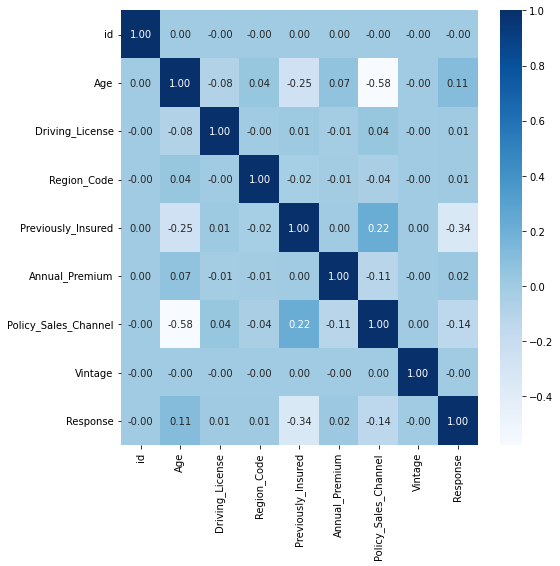

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
# fig = plt.figure(figsize=(15, 15))
# for i in range(0, len(numbs)): # untuk setiap kolom numerik
#     ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
#     sns.stripplot(ax=ax, data=df, x='Response', y=numbs[i]) # gambar catplot/stripplotnya
#     plt.tight_layout()

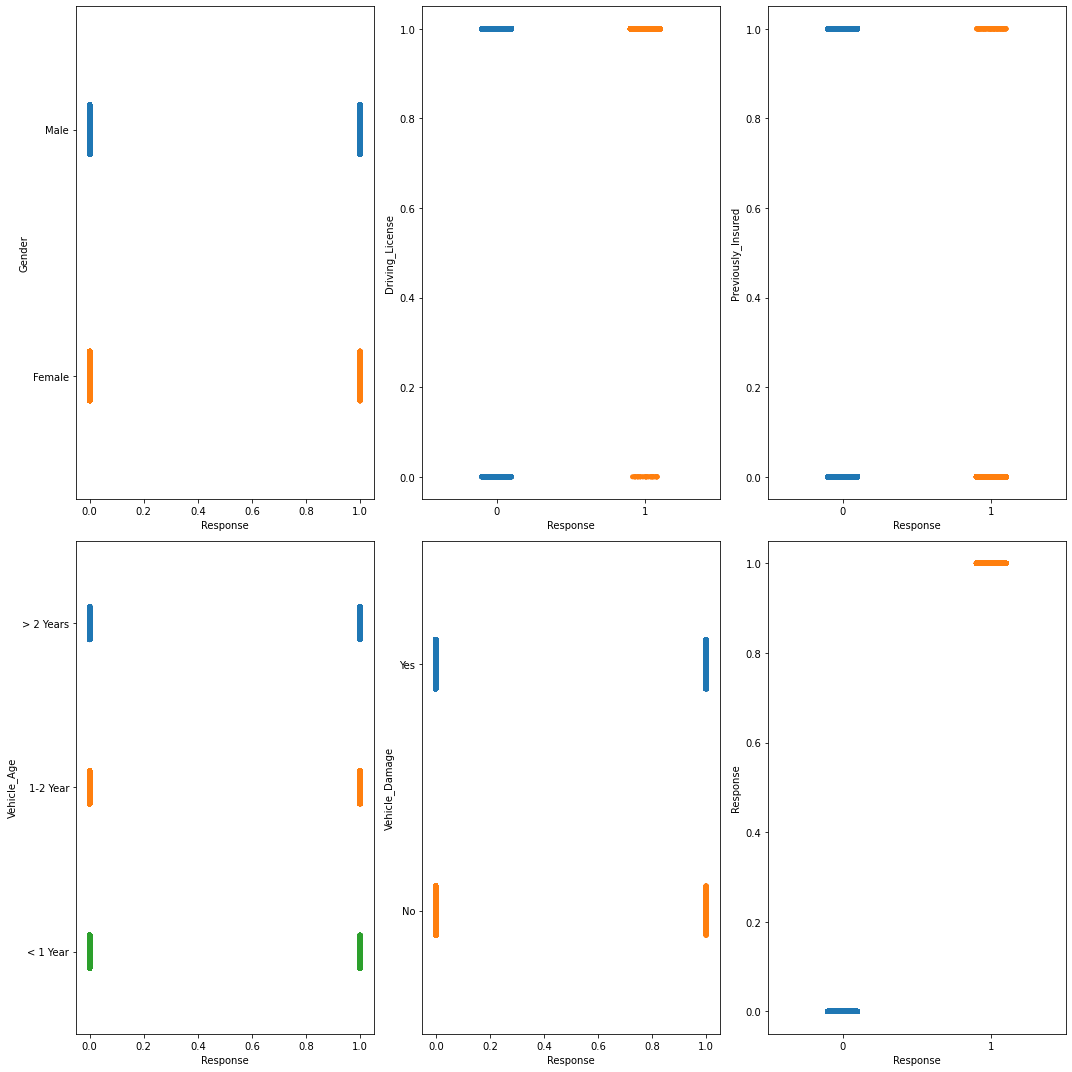

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(cats)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Response', y=cats[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

**yg belum tergambarkan dari heatmap adalah** <br>
-response vs gender <br>
-response vs vehicle damage <br>
-response vs vehicle age <br><br>

**korelasi yang perlu dianalisis lebih lanjut:** <br>
response vs age <br>
response vs previously insured <br>
response vs policy sales channel <br> <br>

age vs previously insured <br>
age vs policy sales channel <br>
annual premium vs policy sales channel <br>
previously insured  vs policy sales channel <br>



##Response vs Gender
*Korelasi yang belum tergambarkan dari Heatmap*

In [ ]:
pd.crosstab(index = df['Response'], columns = df['Gender'], normalize = 'index')

Gender,Female,Male
Response,,
0,0.469006,0.530994
1,0.389317,0.610683


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


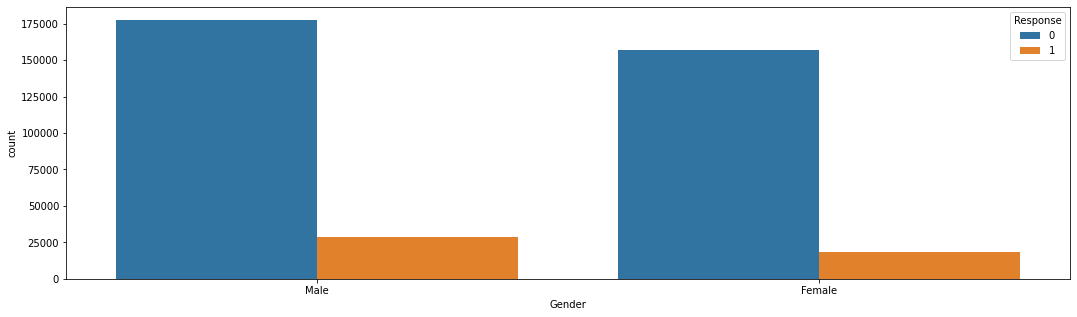

In [ ]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Gender'], hue = df['Response'])
plt.show()

-laki-laki lebih tertarik terhadap asuransi kendaraan <br>
-61% dari responden yang tertarik adalah laki-laki 

##Response vs Vehicle_Damage
*Korelasi yang belum tergambarkan dari Heatmap*

In [ ]:
pd.crosstab(index = df['Response'], columns = df['Vehicle_Damage'], normalize = 'columns')

Vehicle_Damage,No,Yes
Response,,
0,0.994796,0.762345
1,0.005204,0.237655


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


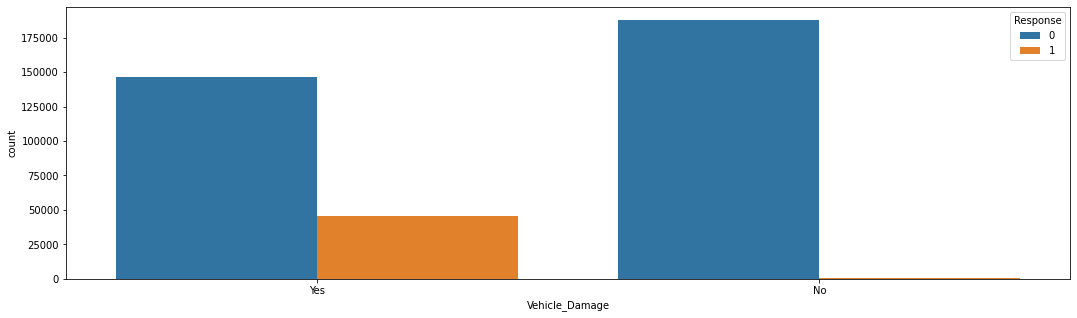

In [ ]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Vehicle_Damage'], hue = df['Response'])
plt.show()

-customer yang mempunyai kerusakaan kendaraan di masa lalu, 23%nya tertarik terhadap asuransi kendaraan

##Response vs Vehicle_Age
*Korelasi yang belum tergambarkan dari Heatmap*

In [ ]:
pd.crosstab(index = df['Response'], columns = df['Vehicle_Age'], normalize = 'columns')

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,0.826245,0.956295,0.706254
1,0.173755,0.043705,0.293746


In [ ]:
df_va=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df_va

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


<Figure size 1296x360 with 0 Axes>

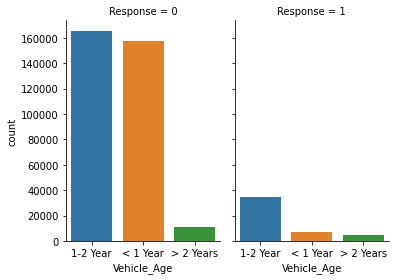

In [ ]:
plt.figure(figsize = (18, 5))
sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df_va, kind="bar",
                height=4, aspect=.7);
plt.show()

-customer yang punya kendaraan <1 tahun tidak tertarik, yg tertarik hanya 4% <br>
-customer yang punya kendaraan >1 tahun cenderung lebih tertarik

##Response vs Age
*Korelasi yang diperhitungkan dari analisis Heatmap*

In [ ]:
pd.crosstab(index = df['Response'], columns = 'Average Age', values = df['Age'], aggfunc='median')

col_0,Average Age
Response,
0,34
1,43


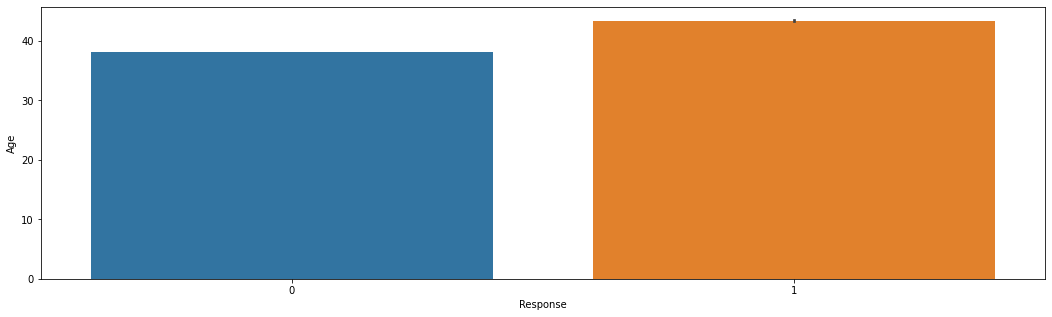

In [ ]:
plt.figure(figsize = (18, 5))
sns.barplot(x = df['Response'], y = df['Age'])
plt.show()

-rata2 umur yang tertarik 43, sedangkan yang tidak tertarik 34

##Age vs Previously_Insured
*Korelasi yang diperhitungkan dari analisis Heatmap*

In [ ]:
pd.crosstab(index = df['Previously_Insured'], columns = 'Average Age', values = df['Age'], aggfunc='median')

col_0,Average Age
Previously_Insured,
0,42
1,27


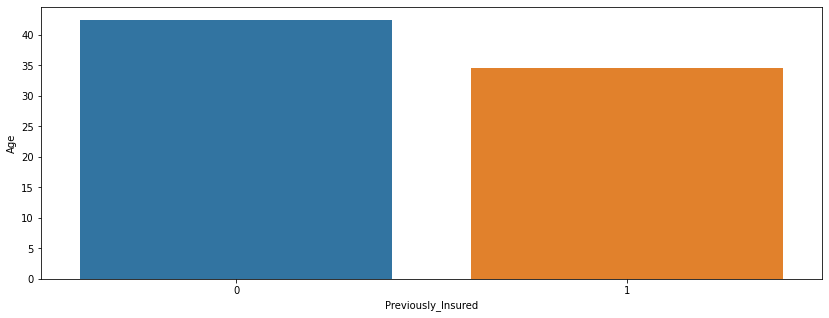

In [ ]:
plt.figure(figsize = (14, 5))
sns.barplot(x = df['Previously_Insured'], y = df['Age'], ci = False)
plt.show()


-rata2 umur yang sebelumnya punya asuransi kendaraan adalah 27 <br>
-rata2 umur yang sebelumnya tidak punya asuransi kendaraan adalah 42

##Previously_Insured vs Response
*Korelasi yang diperhitungkan dari analisis Heatmap*

In [ ]:
pd.crosstab(index = df['Response'], columns = df['Previously_Insured'],normalize='columns')

Previously_Insured,0,1
Response,,
0,0.774546,0.999095
1,0.225454,0.000905


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


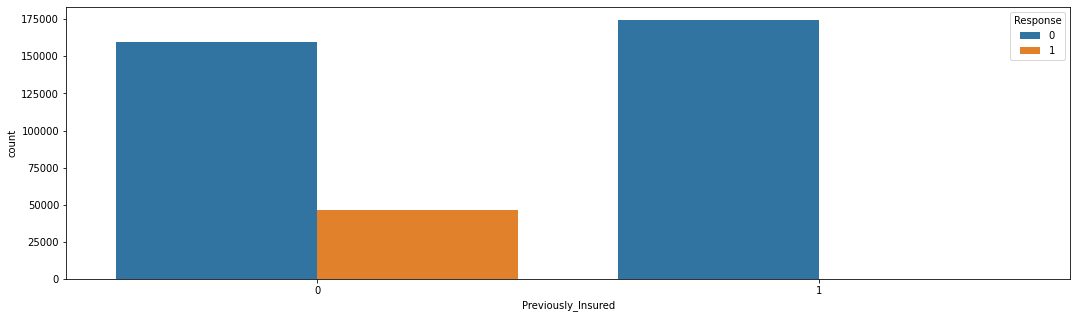

In [ ]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Previously_Insured'], hue = df['Response'])
plt.show()

-hampir semua yang sebelumnya punya asuransi kendaraan, tidak tertarik terhadap asuransi kendaraan yang ditawarkan. sedangkan yang belum punya 23%nya tertarik

##Response vs Policy_Sales_Channel
*Korelasi yang diperhitungkan dari analisis Heatmap*

In [ ]:
pd.crosstab(index = df['Policy_Sales_Channel'], columns = df['Response'], normalize = 'columns').sort_values(1, ascending = False).head()

Response,0,1
Policy_Sales_Channel,,
26.0,0.190817,0.340206
124.0,0.179423,0.299636
152.0,0.391526,0.082595
156.0,0.025012,0.049176
157.0,0.014623,0.038407


In [ ]:
pd.crosstab(index = df['Policy_Sales_Channel'], columns = df['Response'], normalize = 'columns').sort_values(0, ascending = False).head()

Response,0,1
Policy_Sales_Channel,,
152.0,0.391526,0.082595
26.0,0.190817,0.340206
124.0,0.179423,0.299636
160.0,0.063708,0.010169
156.0,0.025012,0.049176


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


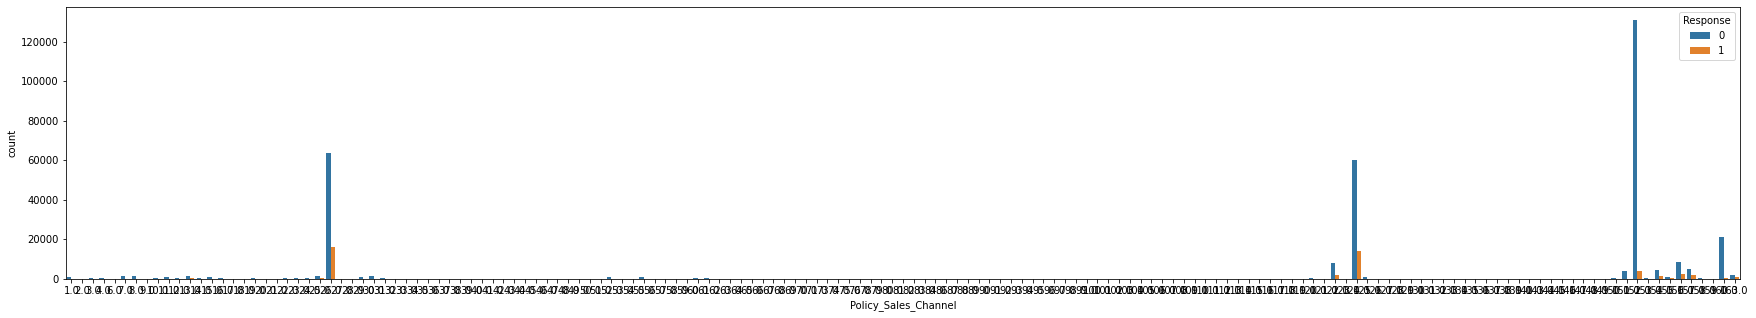

In [ ]:
plt.figure(figsize = (30, 5))
sns.countplot(df['Policy_Sales_Channel'], hue = df['Response'])
plt.show()

menjelaskan policy sales channel dengan response ketertarikan tertinggi dan terendah

##Policy_Sales_Channel vs Age
*Korelasi yang diperhitungkan dari analisis Heatmap*

In [ ]:
pd.crosstab(index = df['Policy_Sales_Channel'], columns = 'Average_Age', values = df['Age'], aggfunc='median')

col_0,Average_Age
Policy_Sales_Channel,
1.0,38.0
2.0,50.0
3.0,58.0
4.0,48.0
6.0,35.0
...,...
157.0,40.0
158.0,40.0
159.0,21.0


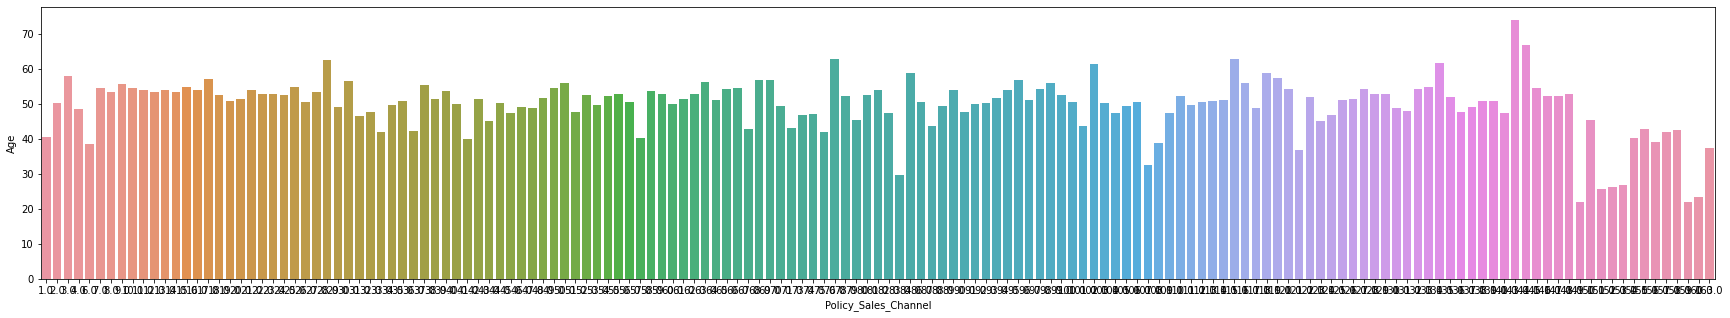

In [ ]:
plt.figure(figsize = (30, 5))
sns.barplot(x = df['Policy_Sales_Channel'], y = df['Age'], ci = False)
plt.show()

menjelaskan policy sales channel dengan rata2 umur

##Policy_Sales_Channel vs Annual Premium
*Korelasi yang diperhitungkan dari analisis Heatmap*

In [ ]:
pd.crosstab(index = df['Policy_Sales_Channel'], columns = 'Median Premium', values = df['Annual_Premium'], aggfunc='median')

col_0,Median Premium
Policy_Sales_Channel,
1.0,2630.0
2.0,2630.0
3.0,37324.0
4.0,30127.0
6.0,29464.0
...,...
157.0,2630.0
158.0,2630.0
159.0,2630.0


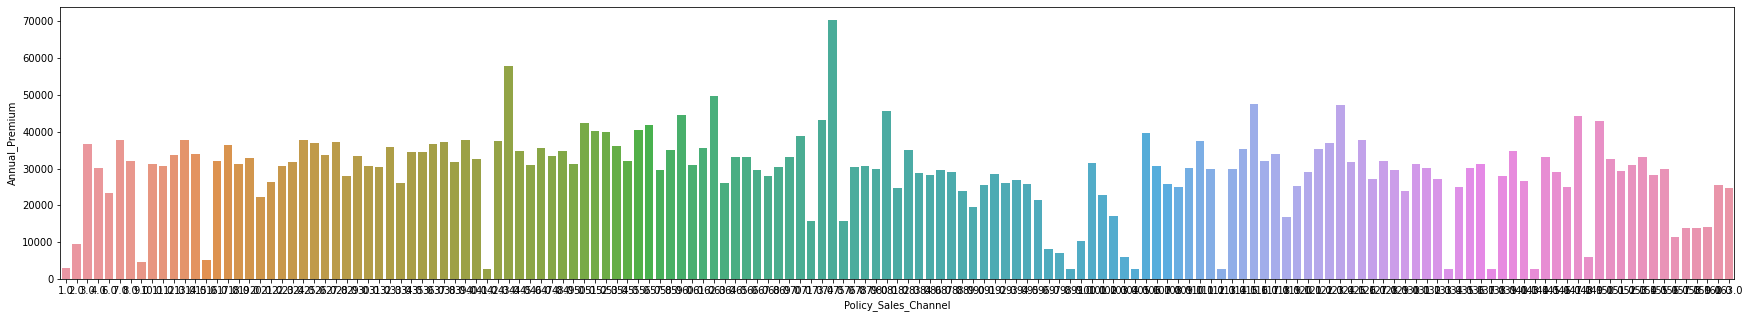

In [ ]:
plt.figure(figsize = (30, 5))
sns.barplot(x = df['Policy_Sales_Channel'], y = df['Annual_Premium'],ci=False)
plt.show()

menjelaskan policy sales channel dengan median premium

##Policy_Sales_Channel vs Previously Insured
*Korelasi yang diperhitungkan dari analisis Heatmap*

In [ ]:
pd.crosstab(index = df['Policy_Sales_Channel'], columns = df['Previously_Insured'], normalize = 'columns').sort_values(1, ascending = False).head()

Previously_Insured,0,1
Policy_Sales_Channel,,
152.0,0.176520,0.563117
26.0,0.268867,0.138489
124.0,0.256222,0.120771
160.0,0.048968,0.066816
122.0,0.035567,0.014809


In [ ]:
pd.crosstab(index = df['Policy_Sales_Channel'], columns = df['Previously_Insured'], normalize = 'columns').sort_values(0, ascending = False).head()

Previously_Insured,0,1
Policy_Sales_Channel,,
26.0,0.268867,0.138489
124.0,0.256222,0.120771
152.0,0.176520,0.563117
160.0,0.048968,0.066816
156.0,0.044852,0.008017


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


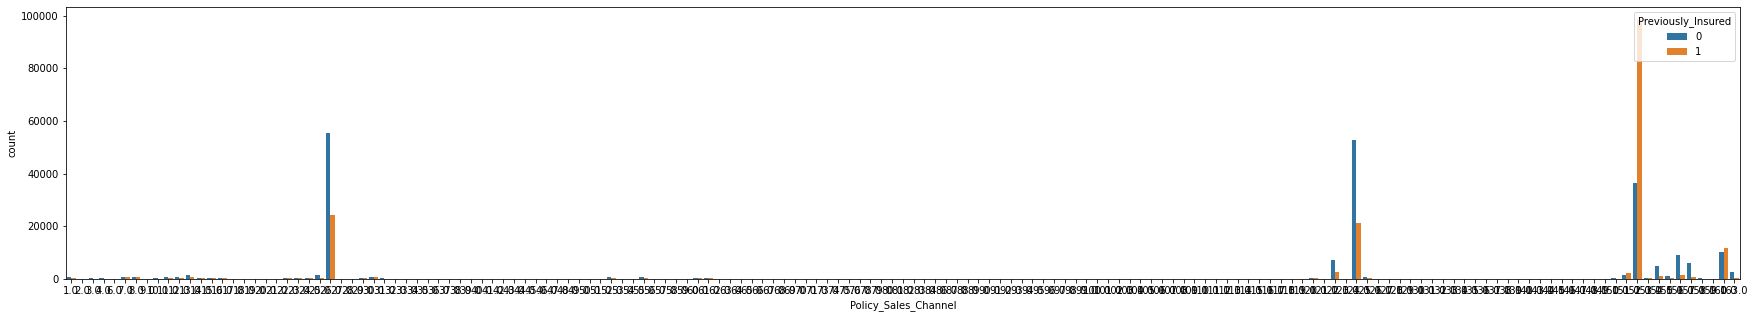

In [ ]:
plt.figure(figsize = (30, 5))
sns.countplot(df['Policy_Sales_Channel'], hue = df['Previously_Insured'])
plt.show()

menjelaskan policy sales channel dengan asuransi kendaraan sebelumnya

**A. korelasi masing-masing feature dan label:** <br>

usulan feature yang relevan dan dipertahankan
-response
-gender
-age
-vehicle damage
-vehicle age
-previously insured
-annual premium



**B. korelasi antar feature:** <br>
Age - Previously Insured


#Business Insight

**Umur kendaraan customer health insurance paling banyak pada 1-2 tahun sebesar 52%**  dan customer dengan umur kendaraan >2 tahun hanya 4%

In [ ]:
df.stb.freq(['Vehicle_Age'], cum_cols=False)

,Vehicle_Age,count,percent
0,1-2 Year,200316,52.561341
1,< 1 Year,164786,43.238549
2,> 2 Years,16007,4.200111


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


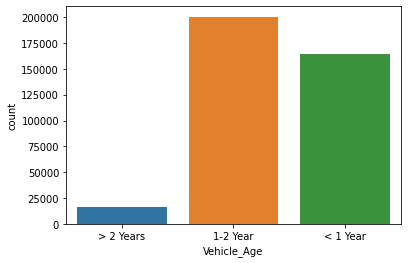

In [ ]:
sns.countplot(df.Vehicle_Age)

dari customer dengan umur kendaraan 1-2 tahun yang tertarik dengan asuransi kendaraan hanya 17%, **namun customer dengan umur kendaraan >2 tahun yang tertarik sebesar 29%**

In [ ]:
pd.crosstab(index = df['Response'], columns = df['Vehicle_Age'], normalize = 'columns')

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,0.826245,0.956295,0.706254
1,0.173755,0.043705,0.293746


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


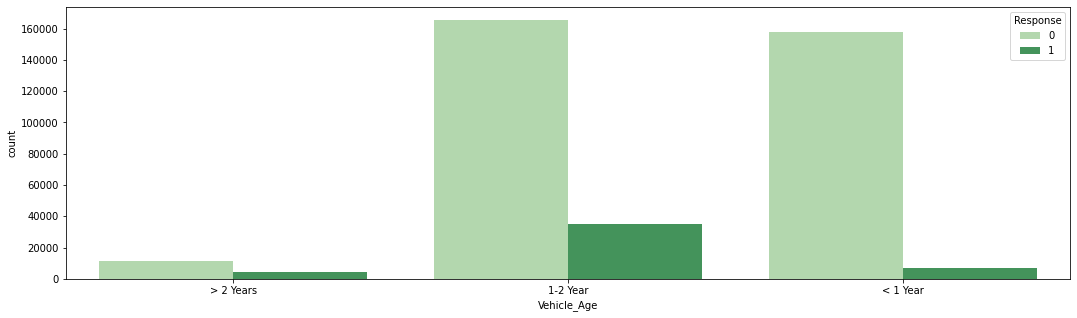

In [ ]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Vehicle_Age'], hue = df['Response'], palette = 'Greens')
plt.show()

**customer health insurance yang sudah mempunyai asuransi kendaraan 99.99% tidak tertarik terhadap info penawaran asuransi kendaraan yang diberikan**

In [ ]:
pd.crosstab(index = df['Response'], columns = df['Previously_Insured'],normalize='columns')

Previously_Insured,0,1
Response,,
0,0.774546,0.999095
1,0.225454,0.000905


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


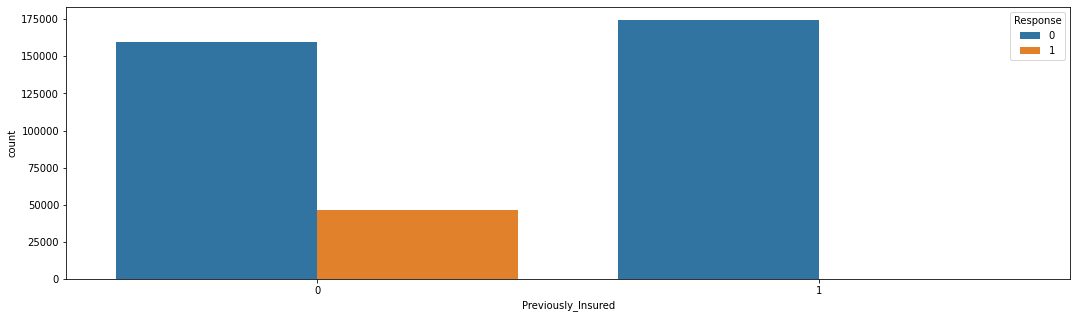

In [ ]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Previously_Insured'], hue = df['Response'])
plt.show()


customer asuransi kesehatan yang mempunyai kendaraan dengan umur < 1 tahun kebanyakan sudah memiliki asuransi (data menunjukkan nilai sebesar 66%), sedangkan yang memiliki umur kendaraan >2 tahun hanya 2%. <br>
**sehingga itu bisa menjadi sebab customer dengan umur kendaraan >2 tahun lebih berminat/tertarik terhadap asuransi kesehatan yang ditawarkan.**

In [ ]:
pd.crosstab(index = df['Previously_Insured'], columns = df['Vehicle_Age'], normalize = 'columns')

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Previously_Insured,,,
0,0.67389,0.336976,0.997126
1,0.32611,0.663024,0.002874


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


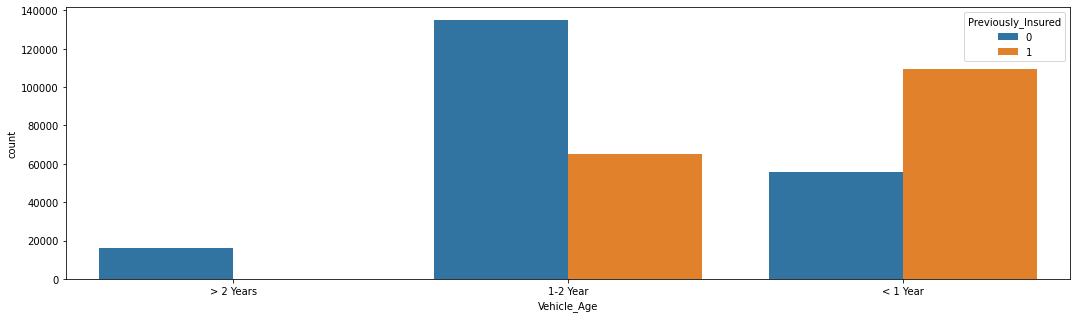

In [ ]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Vehicle_Age'], hue = df['Previously_Insured'])
plt.show()

Customer yang tidak mempunyai kerusakan kendaraan, hanya 0.5% tertarik pada asuransi kendaraan

In [ ]:
pd.crosstab(index = df['Response'], columns = df['Vehicle_Damage'], normalize = 'columns')

Vehicle_Damage,No,Yes
Response,,
0,0.994796,0.762345
1,0.005204,0.237655


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


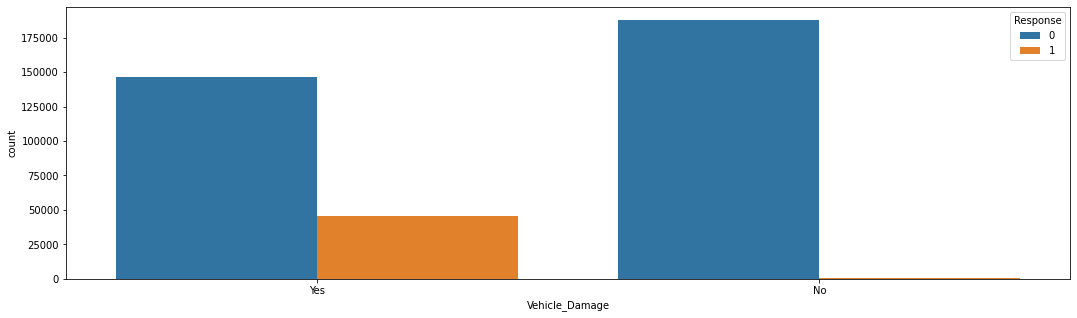

In [ ]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Vehicle_Damage'], hue = df['Response'])
plt.show()

In [ ]:
df_va_a=df[(df['Vehicle_Age']=='> 2 Years')]
df_va_a

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
62,63,Female,62,1,28.0,0,> 2 Years,Yes,33830.0,26.0,130,0
86,87,Female,54,1,47.0,0,> 2 Years,Yes,32873.0,26.0,248,0
97,98,Female,62,1,28.0,0,> 2 Years,Yes,41892.0,155.0,114,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381039,381040,Female,75,1,28.0,0,> 2 Years,Yes,60958.0,26.0,256,0
381065,381066,Female,64,1,28.0,0,> 2 Years,Yes,58713.0,163.0,108,0
381098,381099,Female,68,1,33.0,0,> 2 Years,Yes,36326.0,26.0,196,0
381101,381102,Female,70,1,28.0,0,> 2 Years,Yes,50904.0,122.0,215,0


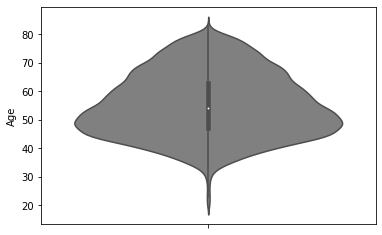

In [ ]:
sns.violinplot(y=df_va_a['Age'], color='gray', orient='v')

**Rekomendasi:**<br>
-memberikan penawaran terhadap customer yang mempunyai kendaraan dengan umur > 2tahun dan berumur di atas 40 tahun <br>
-memberikan penawaran kepada yang belum mempunyai asuransi kendaraan <br>
-memberikan rekomendasi/ edukasi pentingnya asuransi kepada orang-orang yang kendaraannya rusak